In [7]:
!pip install ir-datasets

  Obtaining dependency information for ir-datasets from https://files.pythonhosted.org/packages/d4/79/a1003466149ce37c3461a074ebe6be826e8beb5828ddc1f8ff4685cd7010/ir_datasets-0.5.7-py3-none-any.whl.metadata
  Using cached ir_datasets-0.5.7-py3-none-any.whl.metadata (12 kB)
Using cached ir_datasets-0.5.7-py3-none-any.whl (337 kB)


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import ir_datasets

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Return normalized words after tokenizing a sentence and lemmatizing words
def get_normalized_toks(my_sentence):
  toks = word_tokenize(my_sentence)
  lemmatizer = WordNetLemmatizer()

  # Refer to https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
  tags = nltk.pos_tag(toks)
  result = []
  ## from https://velog.io/@pheol9166/%ED%91%9C%EC%A0%9C%EC%96%B4-%EC%B6%94%EC%B6%9CLemmatization
  for token, tag in tags:
    if tag.startswith('N'):
      lemma = lemmatizer.lemmatize(token, pos='n')
    elif tag.startswith('V'):
      lemma = lemmatizer.lemmatize(token, pos='v')
    elif tag.startswith('J'):
      lemma = lemmatizer.lemmatize(token, pos='a')
    elif tag.startswith('R'):
      lemma = lemmatizer.lemmatize(token, pos='r')
    else:
      lemma = lemmatizer.lemmatize(token)

    result.append(lemma)
  return result


# dataset type: ir_datasets.datasets.base.Dataset
# qid: query id (string type)
def get_answer_set(dataset, qid):
  res = []
  for qrel in dataset.qrels_iter():
    if qid == qrel.query_id:
      if qrel.relevance != -1:
        #print(qrel.query_id, qrel.doc_id, qrel.relevance, qrel.iteration)
        res.append('d'+qrel.doc_id)
  return np.array(res)


print()

#  Example
s = 'experimental investigation of the aerodynamics of a\nwing in a slipstream .\n  an experimental study of a wing in a propeller slipstream was\nmade in order to determine the spanwise distribution of the lift\nincrease due to slipstream at different angles of attack of the wing\nand at different free stream to slipstream velocity ratios.'
toks = get_normalized_toks(s)
print('# example of get_normalized_toks:', toks)

#  Example
dataset = ir_datasets.load("cranfield")
print('the relevant documents of query 1:', get_answer_set(dataset, '1'))

[nltk_data] Downloading package punkt to /Users/dogiheon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dogiheon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dogiheon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



# example of get_normalized_toks: ['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'of', 'a', 'wing', 'in', 'a', 'slipstream', '.', 'an', 'experimental', 'study', 'of', 'a', 'wing', 'in', 'a', 'propeller', 'slipstream', 'be', 'make', 'in', 'order', 'to', 'determine', 'the', 'spanwise', 'distribution', 'of', 'the', 'lift', 'increase', 'due', 'to', 'slipstream', 'at', 'different', 'angle', 'of', 'attack', 'of', 'the', 'wing', 'and', 'at', 'different', 'free', 'stream', 'to', 'slipstream', 'velocity', 'ratio', '.']
the relevant documents of query 1: ['d184' 'd29' 'd31' 'd12' 'd51' 'd102' 'd13' 'd14' 'd15' 'd57' 'd378'
 'd859' 'd185' 'd30' 'd37' 'd52' 'd142' 'd195' 'd875' 'd56' 'd66' 'd95'
 'd462' 'd497' 'd858' 'd876' 'd879' 'd880']


# 1

In [9]:
my_dic = {}
NUM_DOC = 1400-2
NUM_QUERY = 225
for doc in dataset.docs_iter()[:NUM_DOC]:
    toks = get_normalized_toks(doc.text)
    for term in toks:
        if my_dic.get(term)==None:
            my_dic[term]=0
        my_dic[term]+=1

In [10]:
my_dic_desc=sorted(my_dic.values())[::-1]

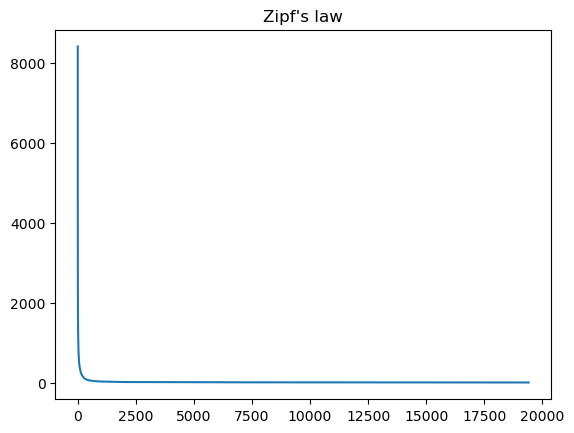

In [11]:
import matplotlib.pyplot as plt

x = my_dic_desc
y = [i for i in range(1,len(my_dic_desc)+1)]

plt.plot(x, y)

plt.title("Zipf's law")

plt.show()

# 2

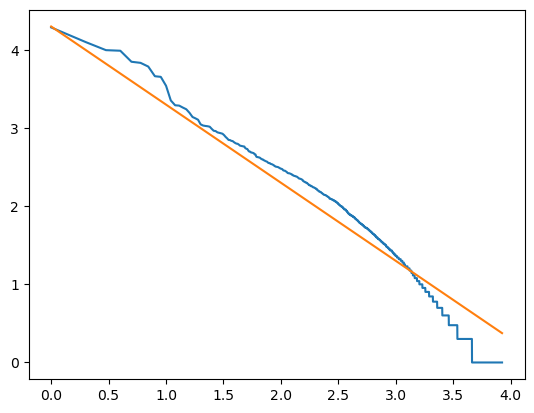

In [12]:
import math

x = [i for i in range(1,len(my_dic_desc)+1)]
y = my_dic_desc
log_x = list(map(lambda x: math.log10(x), x))
log_y = list(map(lambda y: math.log10(y), y))
plt.plot(log_x, log_y)

log_c = 4.3
k = -1

x = [i for i in range(1,len(my_dic_desc)+1)]
y = [i for i in range(1,len(my_dic_desc)+1)]
log_x_2 = list(map(lambda x: math.log10(x), x))
log_y_2 = list(map(lambda y: log_c+k*math.log10(y), y))
plt.plot(log_x_2, log_y_2)

plt.show()

# 3

In [13]:
NUM_DOC = 1400-2

terms=set()
for doc in dataset.docs_iter():
    if doc.text=='': continue
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        terms.add(tok)
terms=sorted(terms)

In [14]:
data=dict()
doc_index=1
for doc in dataset.docs_iter():
    if doc.text=='': continue
    temp=dict()
    for term in terms:
        temp[term]=0.0
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        temp[tok]+=1
    data[f"q{doc_index}"]=list(temp.values())
    doc_index+=1

In [15]:
count_matrix_dataframe = pd.DataFrame(data, index=terms)
print(count_matrix_dataframe)

                q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  ...  q1389  \
$              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
''             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'density       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'displacement  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
zhukhovitskii  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zone           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zoom           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zuk            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zurich         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

               q1390  q1391  q1392  q1393  q1394  q

In [16]:
count_matrix_dataframe.loc[count_matrix_dataframe['q2']>0, 'q2']

's            1.0
,             5.0
.            10.0
a            10.0
again         1.0
             ... 
viscosity     2.0
viscous       2.0
vorticity     2.0
wave          2.0
while         1.0
Name: q2, Length: 95, dtype: float64

# 4

In [17]:
import math as m
import pandas as pd
import numpy as np

In [18]:
global query_df, total_doc

In [19]:
def tfidf_weight(d_vecs, q_vec, mode='nnn.nnn', topk=50):
    mode=mode.split(".")
    d_mode=mode[0]
    q_mode=mode[1]
    
    # query
    q_pd=pd.DataFrame({"tf-raw":list(q_vec.values())})
    if q_mode[0]=='n':
        q_pd["tf-wght"]=q_pd["tf-raw"]
    elif q_mode[0]=='l':
        q_pd["tf-wght"]=q_pd["tf-raw"].apply(lambda x: m.log10(x) + 1 if x > 0 else 0)
    if q_mode[1]=='n':
        q_pd["weight"]=q_pd["tf-wght"]
    elif q_mode[1]=='t':
        q_pd["df"] = query_df
        q_pd["idf"] = np.log10(total_doc / q_pd["df"])
        q_pd["weight"] = q_pd["tf-wght"] * q_pd["idf"]
    if q_mode[2]=='n':
        q_pd["nlized"]=q_pd["weight"]
        
    q_nlized = q_pd["nlized"].tolist()
    
    weights=dict()
    for d_vec in d_vecs:
        d_pd=pd.DataFrame({"tf-raw":list(d_vec[1].values())})
        
        if d_mode[0]=='n':
            d_pd["tf-wght"]=d_pd["tf-raw"]
        elif d_mode[0]=='l':
            d_pd["tf-wght"]=d_pd["tf-raw"].apply(lambda x: m.log10(x) + 1 if x > 0 else 0)
            
        if d_mode[1]=='n':
            d_pd["weight"]=d_pd["tf-wght"]
        
        if d_mode[2]=='n':
            d_pd["nlized"]=d_pd["weight"]
        elif d_mode[2]=='c':
            norm = np.sqrt((d_pd["weight"] ** 2).sum())
            d_pd["nlized"] = d_pd["weight"] / norm
        
        d_nlized = d_pd["nlized"].tolist()
        
        temp_weight = sum(q_nlized[i] * d_nlized[i] for i in range(len(q_nlized)))
        weights[f"d{d_vec[0]}"] = temp_weight
        
    sorted_weights=sorted(weights.items(), key=lambda x:x[1], reverse=True)[:topk]
    return [t[0] for t in sorted_weights]

In [20]:
def get_scores(retrieved_set, relevant_set):
    retrieved_set = set(retrieved_set)
    relevant_set = set(relevant_set)

    relevant_retrieved_set = retrieved_set & relevant_set

    precision = len(relevant_retrieved_set) / len(retrieved_set)
    recall = len(relevant_retrieved_set) / len(relevant_set)

    return (precision,recall)

In [21]:
def initialize(qid):
    # find common terms
    common_terms=set()
    for it in dataset.queries_iter():
        if it.text=='': continue
        if it.query_id==qid:
            toks=get_normalized_toks(it.text)
            for tok in toks:
                common_terms.add(tok)
            break
    for it in dataset.docs_iter():
        toks=get_normalized_toks(it.text)
        for tok in toks:
            common_terms.add(tok)
    common_terms=sorted(common_terms)
    
    # query df
    global query_df, total_doc
    query_df_dict=dict()
    total_doc=0
    for term in common_terms:
        query_df_dict[term]=0
    for it in dataset.docs_iter():
        if it.text=='': continue
        total_doc+=1
        toks=get_normalized_toks(it.text)
        toks_set=set(toks)
        for tok in toks_set:
            query_df_dict[tok]+=1
    query_df=query_df_dict.values()
    
    # query vector
    query_vector=dict()
    for term in common_terms:
        query_vector[term]=0
    for it in dataset.queries_iter():
        if it.text=='': continue
        if it.query_id==qid:
            toks=get_normalized_toks(it.text)
            for tok in toks:
                query_vector[tok]+=1
            break

    # doc_vectors 
    doc_vectors=[]       
    for it in dataset.docs_iter():
        if it.text=='': continue
        doc_id=it.doc_id
        toks=get_normalized_toks(it.text)
        temp_vector=dict()
        for term in common_terms:
            temp_vector[term]=0
        for tok in toks:
            temp_vector[tok]+=1
        doc_vectors.append((doc_id,temp_vector))
        
    # nnn.nnn
    res1=tfidf_weight(doc_vectors,query_vector)
    print('------ nnn.nnn -----')
    print('retrieved set of query',qid,':', res1)
    res2 = get_answer_set(dataset, qid)
    scores = get_scores(res1, res2)
    print('precision/recall:', scores)

    # lnc.ltn
    res1 = tfidf_weight(doc_vectors, query_vector, mode='lnc.ltn')
    print('------ lnc.ltn -----')
    print('retrieved set of query',qid,':', res1)
    res2 = get_answer_set(dataset, qid)
    scores = get_scores(res1, res2)
    print('precision/recall:', scores)

In [22]:
initialize('1')

------ nnn.nnn -----
retrieved set of query 1 : ['d1201', 'd798', 'd1313', 'd244', 'd1147', 'd792', 'd417', 'd329', 'd874', 'd131', 'd721', 'd262', 'd1040', 'd1239', 'd499', 'd928', 'd89', 'd94', 'd1047', 'd315', 'd576', 'd640', 'd160', 'd193', 'd927', 'd717', 'd826', 'd14', 'd427', 'd151', 'd189', 'd433', 'd373', 'd73', 'd110', 'd452', 'd1072', 'd1144', 'd1277', 'd49', 'd1244', 'd202', 'd225', 'd673', 'd695', 'd1268', 'd216', 'd827', 'd1325', 'd9']
precision/recall: (0.02, 0.03571428571428571)
------ lnc.ltn -----
retrieved set of query 1 : ['d51', 'd486', 'd13', 'd12', 'd1268', 'd878', 'd141', 'd184', 'd359', 'd573', 'd251', 'd875', 'd663', 'd526', 'd1361', 'd329', 'd747', 'd1072', 'd78', 'd665', 'd792', 'd14', 'd1003', 'd944', 'd1186', 'd746', 'd56', 'd172', 'd685', 'd374', 'd879', 'd25', 'd880', 'd1328', 'd236', 'd42', 'd154', 'd284', 'd925', 'd1144', 'd1194', 'd232', 'd681', 'd914', 'd332', 'd36', 'd28', 'd1113', 'd435', 'd540']
precision/recall: (0.18, 0.32142857142857145)


In [23]:
initialize('2')

------ nnn.nnn -----
retrieved set of query 2 : ['d1201', 'd798', 'd1313', 'd329', 'd417', 'd1147', 'd244', 'd721', 'd1040', 'd499', 'd792', 'd1239', 'd89', 'd94', 'd927', 'd131', 'd262', 'd673', 'd452', 'd928', 'd160', 'd73', 'd1047', 'd1244', 'd433', 'd826', 'd522', 'd315', 'd874', 'd1144', 'd199', 'd1072', 'd189', 'd576', 'd757', 'd364', 'd49', 'd140', 'd151', 'd193', 'd272', 'd827', 'd225', 'd640', 'd797', 'd14', 'd210', 'd695', 'd992', 'd1248']
precision/recall: (0.02, 0.041666666666666664)
------ lnc.ltn -----
retrieved set of query 2 : ['d12', 'd51', 'd746', 'd875', 'd884', 'd1089', 'd172', 'd792', 'd1169', 'd1170', 'd729', 'd251', 'd747', 'd724', 'd1158', 'd700', 'd14', 'd781', 'd36', 'd141', 'd726', 'd374', 'd429', 'd253', 'd75', 'd1380', 'd883', 'd908', 'd607', 'd878', 'd1263', 'd1217', 'd846', 'd810', 'd78', 'd486', 'd288', 'd606', 'd390', 'd1042', 'd47', 'd925', 'd712', 'd284', 'd1147', 'd876', 'd1095', 'd1163', 'd1300', 'd805']
precision/recall: (0.1, 0.20833333333333334)
